In [1]:
#matlab, packages 
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

#### guassian distribution data 

In [3]:
data = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)

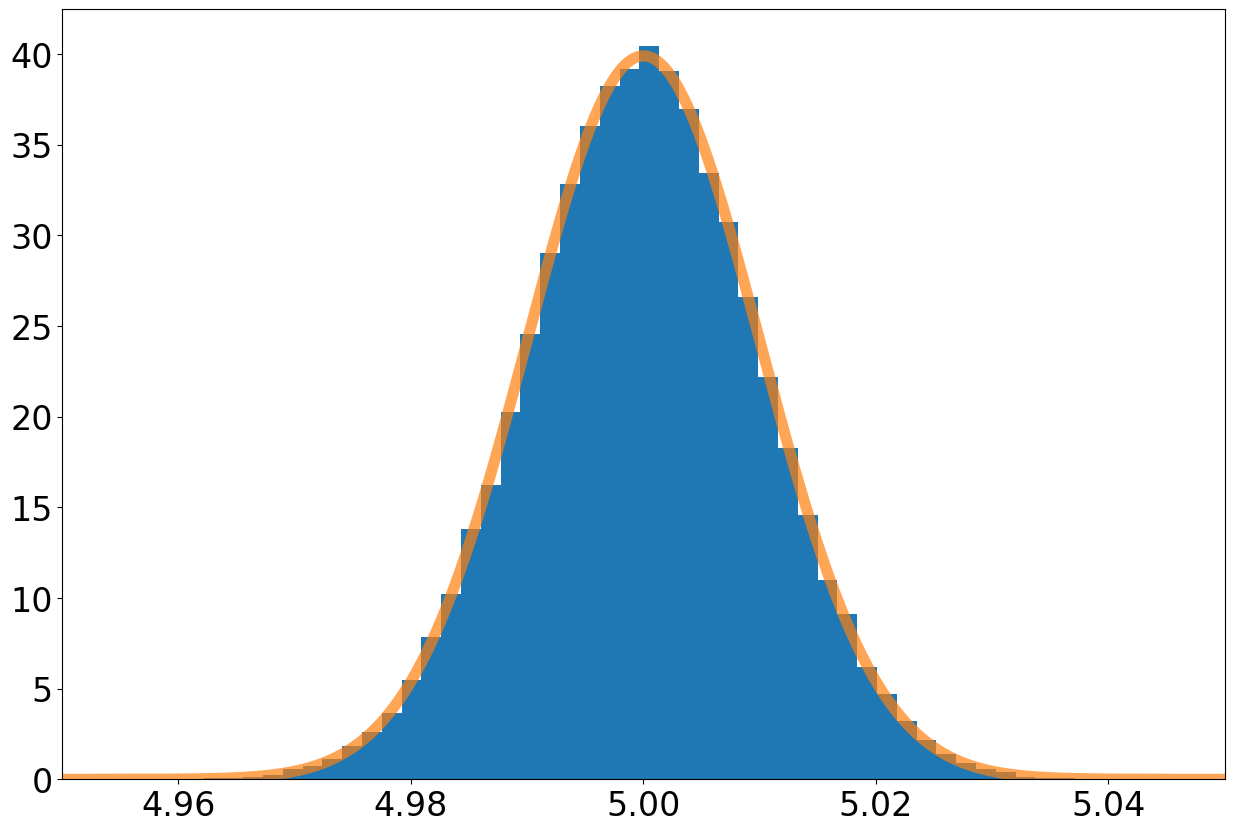

In [4]:
fig, ax = plt.subplots(1, 1)
#hist graph
ax.hist(data,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([4.95,5.05])
x = np.linspace(4.95,5.05,1000)
ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

In [5]:
p = stats.norm.cdf(data, data.mean(),data.std())

In [10]:
p1 = stats.norm.cdf(5.02, data.mean(),data.std())
p1

0.9773880239277004

In [11]:
sigma1 = stats.norm.ppf(p1)
sigma1

2.0025654432716733

In [15]:
p2 = stats.norm.cdf(4.95, data.mean(),data.std())
p2

2.6206122403865657e-07

In [16]:
sigma2 = stats.norm.ppf(p2)
sigma2

-5.017265022998737

#### Rayleigh distribution data 

In [46]:
data1 = stats.rayleigh.rvs(loc = 0., scale = 1, size = 100000)

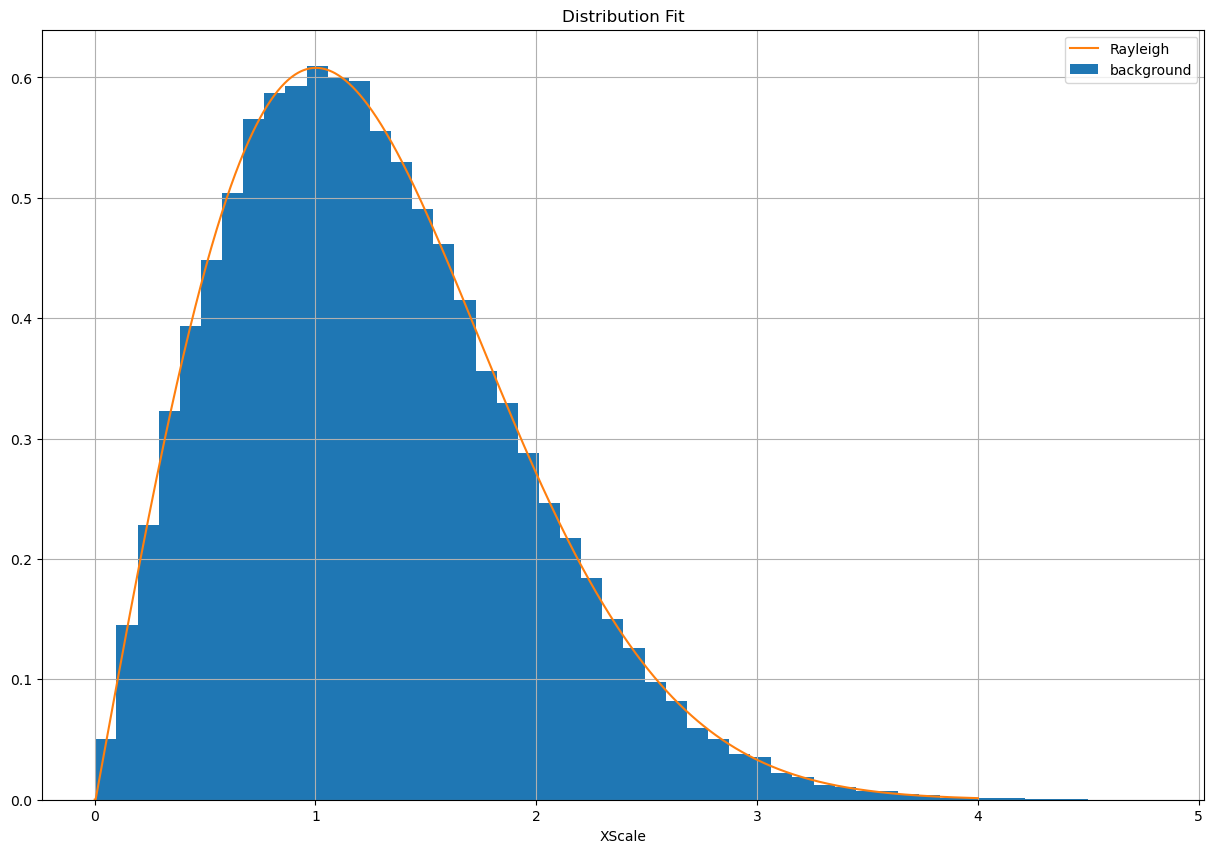

In [49]:
loc, scale = stats.rayleigh.fit(data1) 

# Tabulate over sample range (PDF display):
xl = np.linspace(0., 4.,1000)

# Display Results:
fig, ax = plt.subplots()

ax.hist(data1,50,density=1, label="background")

ax.plot(xl,stats.rayleigh(scale=scale, loc=loc).pdf(xl), label="Rayleigh")
ax.set_title("Distribution Fit")
ax.set_xlabel("XScale")

ax.legend()
ax.grid()

#### Select a value for your hypothetical measurement
My value would be 3.0

statistical question:
In scale of 0 to 4 grade, the probabilty to get a grade greater or equal to 3.0.

Therefore, the chance wuold be the area under the curve when x > 3. In other words, the chance would be the integral of the curve limit at 3 to infinity

In [52]:
p_above3 = stats.norm.cdf(3.0,data1.mean(),data1.std())
p_above3

0.996203217699876

In [53]:
#Z value
z_above3 = stats.norm.ppf(p_above3)
z_above3

2.6696265762432727

In [55]:
p_value = stats.norm.cdf(2.0,data1.mean(),data1.std())
z_value = stats.norm.ppf(p_value)
print(z_value,p_value)

1.1403451454672806 0.8729287317827576


In [56]:
p_value = stats.norm.cdf(1.3,data1.mean(),data1.std())
z_value = stats.norm.ppf(p_value)
print(z_value,p_value)

0.06984814392408595 0.527842736294092


In [57]:
p_value = stats.norm.cdf(1,data1.mean(),data1.std())
z_value = stats.norm.ppf(p_value)
print(z_value,p_value)

-0.38893628530871194 0.3486616397473189


In [58]:
p_value = stats.norm.cdf(0.5,data1.mean(),data1.std())
z_value = stats.norm.ppf(p_value)
print(z_value,p_value)

-1.1535770006967077 0.12433681604220492


#### Pattern

1. when the slope of the curve is positive, our z value would be positive and if the slope is negative, then the z-value would be nagetive too.
2. For positive values, as the probability goes up, z value would also go up. For Negative values, the pattern is the same as positive values.

## Non-continuous distributions - Poisson

1. Read up on the distributions
2. Make a series of plots with different parameters; and explain the features. (Hint: your plots will need to be discrete, sometimes 'stairs' style plots can be helpful).
3. Again define a hypothetical question (clearly stated), and calculate the corresponding probability
4. Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.
5. While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.

In [97]:
mu = 0.6
data_poisson = stats.poisson.rvs(mu = mu ,size = 100000)
data_poisson

array([1, 0, 0, ..., 2, 1, 0])

<function matplotlib.pyplot.show(close=None, block=None)>

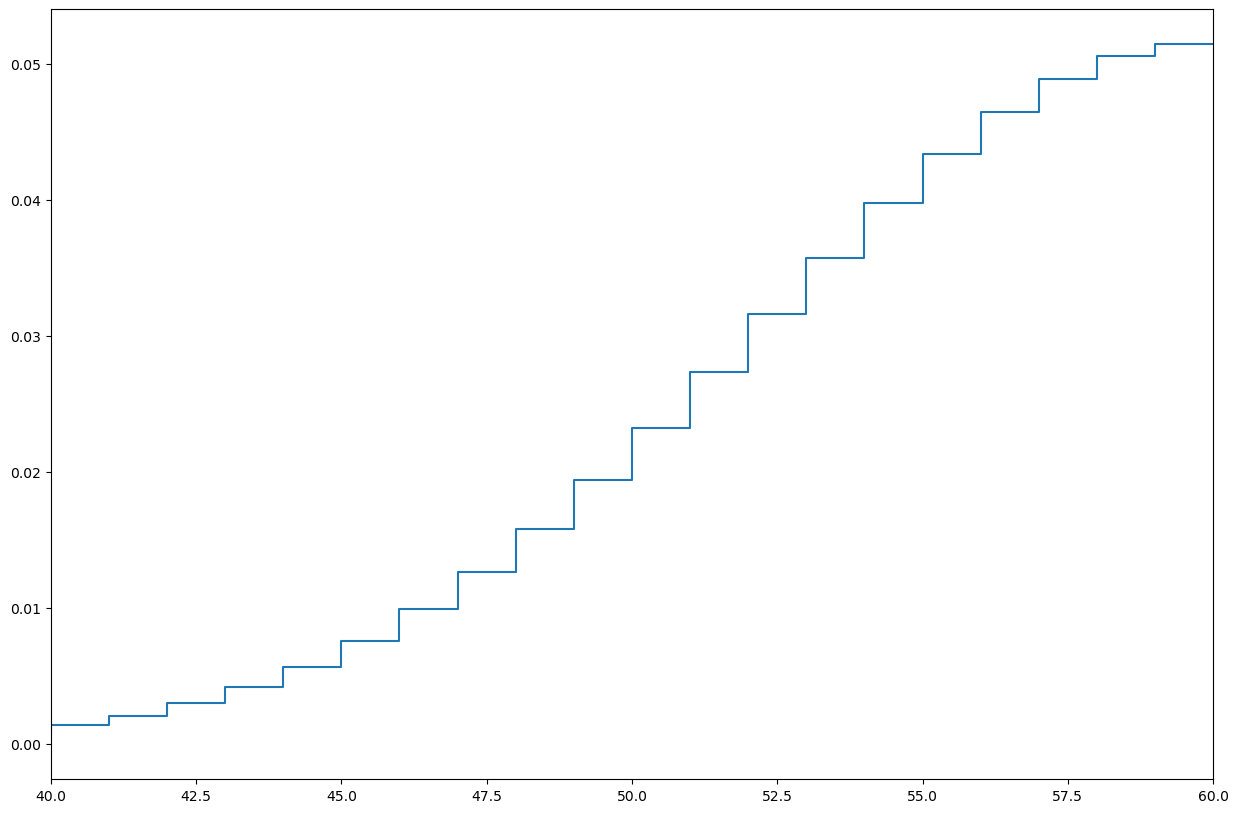

In [111]:
fig, ax = plt.subplots()
n = 60
p = 1.

r_value = list(range(n+1))
dist = [stats.poisson.pmf(r, n, p) for r in r_value]
plt.xlim([40,60])
plt.step(r_value, dist)
plt.show